# Pictures compression using SVD
In this exercise you are supposed to study how SVD could be used in image compression.

_Based on open course in [Numerical Linear Algebra](https://github.com/oseledets/nla2018) by Ivan Oseledets_

In [1]:
# If you are using colab, uncomment this cell

! wget https://raw.githubusercontent.com/girafe-ai/ml-mipt/a5bf18c/datasets/waiting.jpeg
! wget https://raw.githubusercontent.com/girafe-ai/ml-mipt/a5bf18c/datasets/mipt.jpg
! wget https://raw.githubusercontent.com/girafe-ai/ml-mipt/a5bf18c/datasets/simpsons.jpg

! mkdir ../dataset
! mv -t ../dataset waiting.jpeg mipt.jpg simpsons.jpg

--2022-03-29 04:17:53--  https://raw.githubusercontent.com/girafe-ai/ml-mipt/a5bf18c/datasets/waiting.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 40516 (40K) [image/jpeg]
Saving to: ‘waiting.jpeg’

waiting.jpeg        100%[===================>]  39.57K  --.-KB/s    in 0.007s  

2022-03-29 04:17:53 (5.93 MB/s) - ‘waiting.jpeg’ saved [40516/40516]

--2022-03-29 04:17:54--  https://raw.githubusercontent.com/girafe-ai/ml-mipt/a5bf18c/datasets/mipt.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 190845 (186K) [image/jpeg]


In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

## 1. Singular values

Compute the singular values of some predownloaded image (via the code provided below) and plot them. Do not forget to use logarithmic scale.

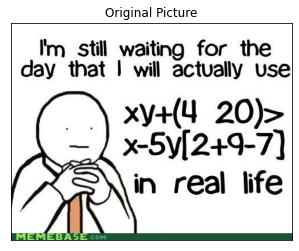

In [11]:
face_raw = Image.open("../dataset/waiting.jpeg")
face = np.array(face_raw).astype(np.uint8)

plt.imshow(face_raw)
plt.xticks(())
plt.yticks(())
plt.title("Original Picture")
plt.show()

In [12]:
# optional: zero mean the image
face = face - np.mean(face, axis=1, keepdims=True)



# YOUR CODE HERE: Compute SVD and plot the singular values for different image channels

In [13]:
# Image is saved as a 3-dimensional array with shape H x W x C (heigt x width x channels)
Rf = face[:,:,0]
Gf = face[:,:,1]
Bf = face[:,:,2]

# Compute SVD and plot the singular values for different image channels
u, Rs, vh = np.linalg.svd(Rf, full_matrices=False)
u, Gs, vh = np.linalg.svd(Gf, full_matrices=False)
u, Bs, vh = np.linalg.svd(Bf, full_matrices=False)


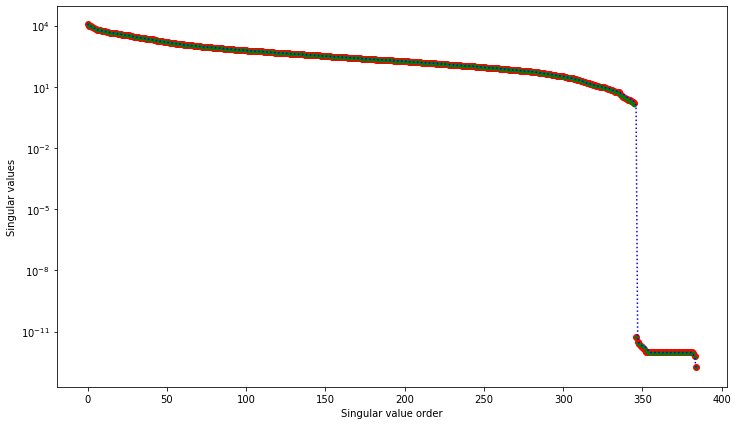

In [14]:
plt.figure(figsize=(12,7))
plt.plot(Rs,'ro')
plt.plot(Gs,'g.')
plt.plot(Bs,'b:')
plt.yscale('log')
plt.ylabel("Singular values")
plt.xlabel("Singular value order")
plt.show()

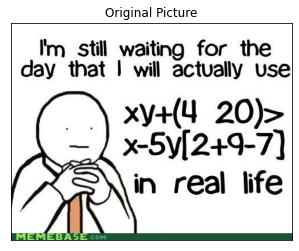

In [28]:
face_raw = Image.open("../dataset/waiting.jpeg")
face = np.array(face_raw).astype(np.uint8)

plt.imshow(face_raw)
plt.xticks(())
plt.yticks(())
plt.title("Original Picture")
plt.show()

## 2. Compress

Complete a function ```compress```, that performs SVD and truncates it (using $k$ singular values/vectors). See the prototype below. 

Note, that in case when your images are not grayscale you have to split your image to channels and work with matrices corresponding to different channels separately.

Plot approximate reconstructed image $M_\varepsilon$ of your favorite image such that $rank(M_\varepsilon) = 5, 20, 50$ using ```plt.subplots```.

In [29]:
face_raw = Image.open("../dataset/waiting.jpeg")
face = np.array(face_raw).astype(np.uint8)

plt.imshow(face_raw)
plt.xticks(())
plt.yticks(())
plt.title("Original Picture")
plt.show()

def compress(image, k, scale=False):
    """
    Perform svd decomposition and truncate it (using k singular values/vectors)

    Parameters:
        image (np.array): input image (probably, colourful)
        k (int): approximation rank

    Returns:
      reconst_matrix (np.array): reconstructed matrix (tensor in colourful case)
      s (np.array): array of singular values
    """
    # YOUR CODE HERE: Compute per-channel SVD for and reconstruct the input image with the given approximation rank
    if scale:
      R = image[..., 0] / 255.
      G = image[..., 1] / 255.
      B = image[..., 2] / 255.
    else:
      R = image[..., 0]
      G = image[..., 1]
      B = image[..., 2]

    uR, Rs, vR = np.linalg.svd(R, full_matrices=False)
    uG, Gs, vG = np.linalg.svd(G, full_matrices=False)
    uB, Bs, vB = np.linalg.svd(B, full_matrices=False)

    reconst_matrix = np.concatenate([
        (uR[:, :k] @ (np.eye(k)*Rs[:k]) @ vR[:k, :])[:, :, None], 
        (uG[:, :k] @ (np.eye(k)*Gs[:k]) @ vG[:k, :])[:, :, None],
        (uB[:, :k] @ (np.eye(k)*Bs[:k]) @ vB[:k, :])[:, :, None],
    ], axis=-1)
    s = np.concatenate([Rs[:k][:, None], Gs[:k][:, None], Bs[:k][:, None]], axis=-1)
    # if scale:
    #   reconst_matrix *= 255.
    return reconst_matrix, s



face_compressed, s = compress(face, k=25, scale=False)
plt.imshow(face_compressed.astype(np.float32)/255)
plt.xticks(())
plt.yticks(())
plt.show()


In [38]:
face_compressed, s = compress(face, k=25, scale=False)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


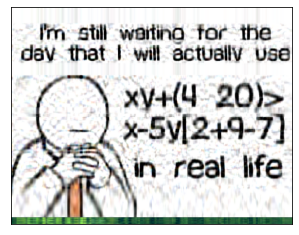

In [39]:
plt.imshow(face_compressed.astype(np.float32)/255)
plt.xticks(())
plt.yticks(())
plt.show()


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


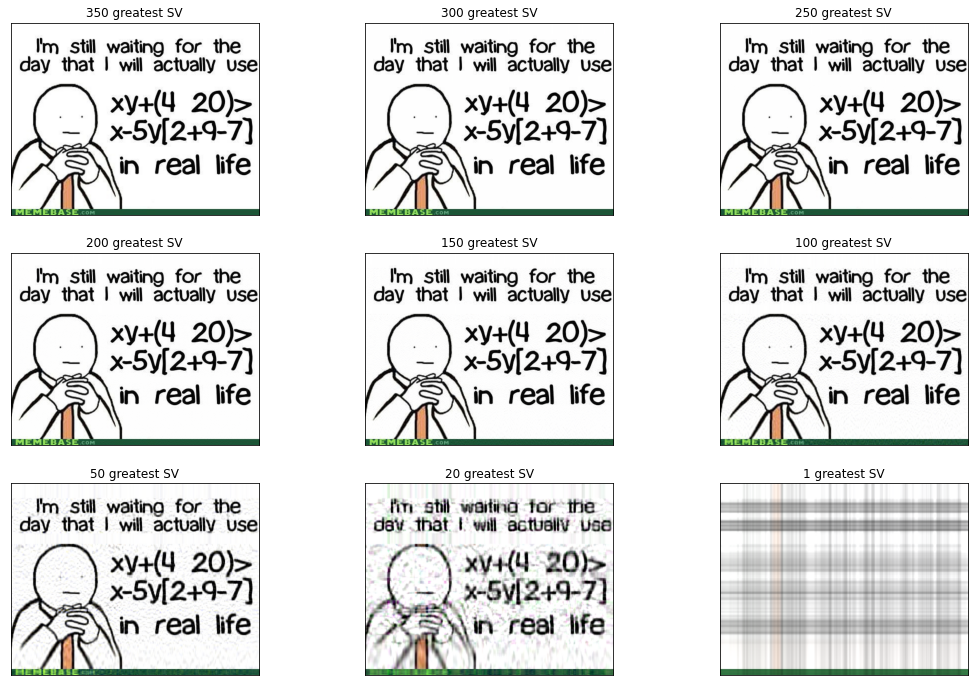

In [41]:
plt.figure(figsize=(18,12))
for i,k in enumerate([350,300,250,200,150,100,50,20,1]):
    plt.subplot(3,3,i+1)
    im,s = compress(face, k=k, scale=False)
    plt.imshow(im.astype(np.float32)/255)
    plt.xticks(())
    plt.yticks(())
    plt.title("{} greatest SV".format(k))

In [42]:
err = []
compression_rate = [] 
scale = False
for k in range(min(face.shape[:2]), 5, -10):

  face_compressed, s = compress(face, k=k, scale=scale)
  if scale:
    err.append(((face.astype(np.float32)/255. - face_compressed)**2).mean())
  else:
    err.append(((face.astype(np.float32) - face_compressed)**2).mean())
  compression_rate.append((k*(1 + face.shape[0] + face.shape[1]))/ (face.shape[0]*face.shape[1]))

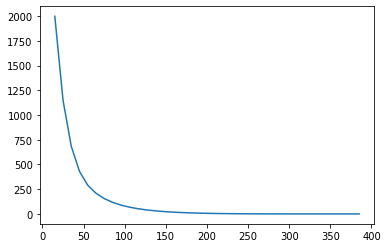

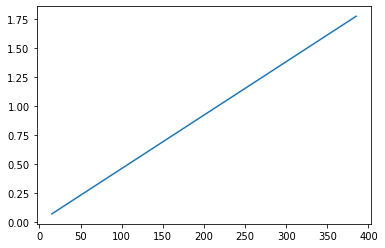

In [43]:
plt.plot(np.arange(min(face.shape[:2]), 5, -10), err)
plt.show()
plt.plot(np.arange(min(face.shape[:2]), 5, -10), compression_rate)
plt.show()

# plt.yscale('log')

## 3. Discover

Plot the following two figures for your favorite picture
* How relative error of approximation depends on the rank of approximation?
* How compression rate in terms of storing information ((singular vectors + singular numbers) / total size of image) depends on the rank of approximation?

In [ ]:
# YOUR CODE HERE

## 4. Compare

 Consider the following two pictures. Compute their approximations (with the same rank, or relative error). What do you see? Explain results.

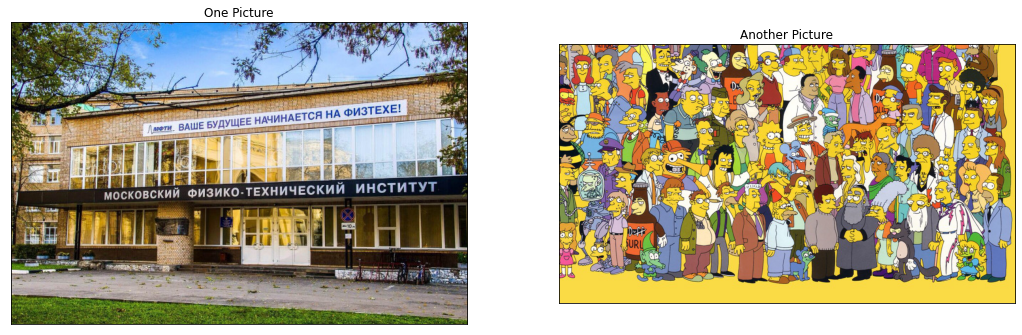

In [44]:
image_raw1 = Image.open("../dataset/mipt.jpg")
image_raw2 = Image.open("../dataset/simpsons.jpg")

image1 = np.array(image_raw1).astype(np.uint8)
image2 = np.array(image_raw2).astype(np.uint8)

plt.figure(figsize=(18, 6))
plt.subplot(1, 2, 1)
plt.imshow(image_raw1)
plt.title("One Picture")
plt.xticks(())
plt.yticks(())

plt.subplot(1, 2, 2)
plt.imshow(image_raw2)
plt.title("Another Picture")
plt.xticks(())
plt.yticks(())

plt.show()

In [45]:
# Image is saved as a 3-dimensional array with shape H x W x C (heigt x width x channels)
Rf = image1[:,:,0]
Gf = image1[:,:,1]
Bf = image1[:,:,2]

# Compute SVD and plot the singular values for different image channels
u, Rs, vh = np.linalg.svd(Rf, full_matrices=False)
u, Gs, vh = np.linalg.svd(Gf, full_matrices=False)
u, Bs, vh = np.linalg.svd(Bf, full_matrices=False)


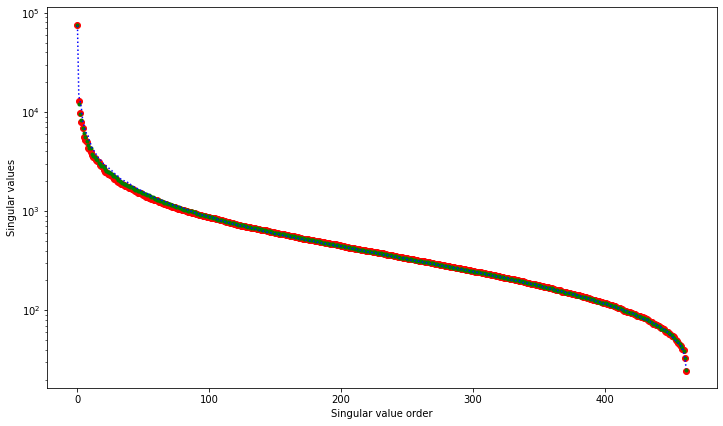

In [46]:
plt.figure(figsize=(12,7))
plt.plot(Rs,'ro')
plt.plot(Gs,'g.')
plt.plot(Bs,'b:')
plt.yscale('log')
plt.ylabel("Singular values")
plt.xlabel("Singular value order")
plt.show()

In [47]:
# Image is saved as a 3-dimensional array with shape H x W x C (heigt x width x channels)
Rf = image2[:,:,0]
Gf = image2[:,:,1]
Bf = image2[:,:,2]

# Compute SVD and plot the singular values for different image channels
u, Rs, vh = np.linalg.svd(Rf, full_matrices=False)
u, Gs, vh = np.linalg.svd(Gf, full_matrices=False)
u, Bs, vh = np.linalg.svd(Bf, full_matrices=False)


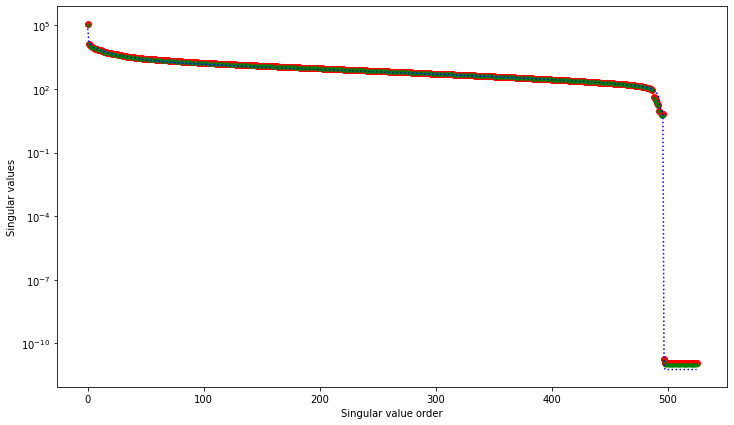

In [48]:
plt.figure(figsize=(12,7))
plt.plot(Rs,'ro')
plt.plot(Gs,'g.')
plt.plot(Bs,'b:')
plt.yscale('log')
plt.ylabel("Singular values")
plt.xlabel("Singular value order")
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


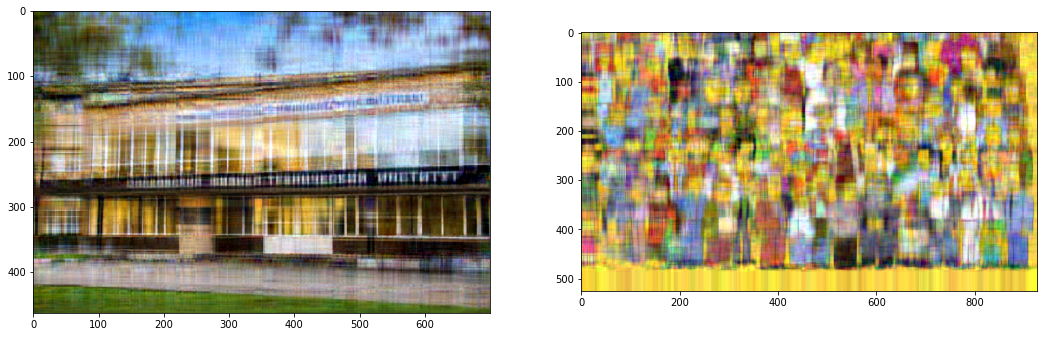

In [50]:
# Your code is here
im1, s = compress(image1, 100, False)
im2, s = compress(image2, 100, False)

plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
im1_,s = compress(im1, k=k, scale=False)
plt.imshow(im1_.astype(np.float32)/255)

plt.subplot(1,2,2)
im2_,s = compress(im2, k=k, scale=False)
plt.imshow(im2_.astype(np.float32)/255)

plt.show()

In [51]:
from tqdm import tqdm

In [52]:
k_list = range(5,500,10)
rel_err1 = []
rel_err2 = []
relative_error_threshold = 0.15

for k in tqdm(k_list):
    image1_compressed, s = compress(image1, k, False)
    image2_compressed, s = compress(image2, k, False)
    
    relative_error_1 = np.linalg.norm(image1_compressed.astype(np.float64) - image1.astype(np.float64))
    relative_error_1 /= np.linalg.norm(image1.astype(np.float64))
    
    relative_error_2 = np.linalg.norm(image2_compressed.astype(np.float64) - image2.astype(np.float64))
    relative_error_2 /= np.linalg.norm(image2.astype(np.float64))
    
    rel_err1.append(relative_error_1)
    rel_err2.append(relative_error_2)



 92%|█████████▏| 46/50 [01:08<00:05,  1.50s/it]


ValueError: ignored

K1 = 35; K2 = 75


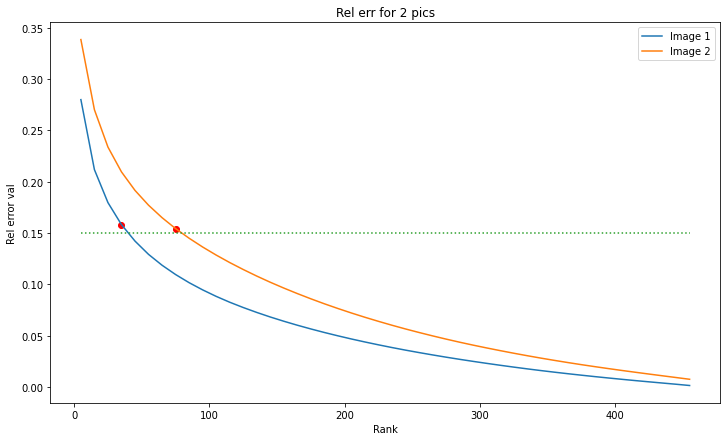

In [58]:
# find the indices
idx1 = int(np.argwhere(np.diff(np.sign(np.array(rel_err1) - relative_error_threshold))).flatten())
idx2 = int(np.argwhere(np.diff(np.sign(np.array(rel_err2) - relative_error_threshold))).flatten())
print("K1 = {}; K2 = {}".format(k_list[idx1], k_list[idx2]))

plt.figure(figsize=(12,7))

plt.plot(k_list[idx1], rel_err1[idx1], 'ro')
plt.plot(k_list[idx2], rel_err2[idx2], 'ro')
plt.title("Rel err for 2 pics")
plt.xlabel("Rank")
plt.ylabel("Rel error val")

plt.plot(k_list[:len(rel_err1)], rel_err1, label="Image 1")
plt.plot(k_list[:len(rel_err2)], rel_err2, label="Image 2")
plt.plot(k_list[:len(rel_err1)], [relative_error_threshold]*len(k_list[:len(rel_err1)]),":",)

plt.legend()
plt.show()

In [54]:
len(k_list)

50

In [55]:
len(rel_err1)

46

In [56]:
len(rel_err2)

46

In [59]:
! wget https://raw.githubusercontent.com/girafe-ai/ml-mipt/21f_basic/homeworks_basic/Lab1_ML_pipeline_and_SVM/car_data.csv

--2022-03-29 04:49:36--  https://raw.githubusercontent.com/girafe-ai/ml-mipt/21f_basic/homeworks_basic/Lab1_ML_pipeline_and_SVM/car_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 58374 (57K) [text/plain]
Saving to: ‘car_data.csv’

car_data.csv        100%[===================>]  57.01K  --.-KB/s    in 0.009s  

2022-03-29 04:49:36 (6.41 MB/s) - ‘car_data.csv’ saved [58374/58374]



In [60]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]

print(data.shape, target.shape)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(846, 19) (846,)
(549, 19) (549,) (297, 19) (297,)


In [129]:
dataset[:, 0]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52,
       53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69,
       70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86,
       87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102,
       103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115,
       116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128,
       129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141,
       142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154,
       155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167,
       168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180,
       181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193,
       194, 195, 196, 197, 198, 199, 200, 201, 20

In [61]:
X_train_pd = pd.DataFrame(X_train)

# First 15 rows of our dataset.
X_train_pd.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,550,86,38,58,119,56,4,118,57,17,129,140,208,152,78,9,2,184,186
1,353,81,47,69,146,64,6,151,44,19,147,171,340,195,75,5,0,183,188
2,721,105,54,108,234,70,12,215,31,24,168,226,687,228,68,4,22,189,201
3,234,93,42,64,158,68,9,134,49,18,142,163,268,170,71,7,13,192,201
4,212,90,41,71,169,68,7,150,44,19,138,175,336,157,71,3,18,192,197
5,757,91,43,72,142,56,7,149,45,19,140,168,327,165,72,13,23,186,191
6,430,104,53,108,206,61,11,217,31,24,168,226,694,209,67,0,9,188,201
7,619,97,55,96,170,54,10,216,31,24,173,219,685,218,75,0,4,184,193
8,420,96,39,58,117,51,6,133,52,18,139,154,255,150,86,6,0,181,182
9,199,82,44,72,136,61,7,147,46,19,143,173,317,183,81,6,17,181,185


In [122]:
X_train_pd.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,432.415301,94.311475,45.194900,83.105647,171.562842,62.025501,8.672131,170.927140,40.429872,20.739526,148.734062,190.670310,450.777778,175.908925,72.336976,6.353370,12.894353,189.040073,195.848816
std,244.654931,8.142183,6.317648,15.739199,34.322087,8.562101,4.832785,33.552907,7.838766,2.620718,14.953649,31.825176,178.638397,33.235486,7.492899,4.830606,8.747040,6.050445,7.276155
min,0.000000,78.000000,34.000000,42.000000,109.000000,47.000000,2.000000,114.000000,26.000000,17.000000,118.000000,131.000000,191.000000,113.000000,59.000000,0.000000,0.000000,176.000000,181.000000
25%,215.000000,88.000000,40.000000,71.000000,143.000000,57.000000,7.000000,148.000000,33.000000,19.000000,137.000000,168.000000,323.000000,149.000000,67.000000,2.000000,6.000000,185.000000,191.000000
50%,430.000000,93.000000,45.000000,81.000000,171.000000,62.000000,8.000000,159.000000,42.000000,20.000000,147.000000,181.000000,373.000000,176.000000,71.000000,6.000000,11.000000,189.000000,197.000000
75%,648.000000,100.000000,51.000000,98.000000,197.000000,66.000000,10.000000,201.000000,46.000000,23.000000,161.000000,219.000000,611.000000,200.000000,75.000000,9.000000,19.000000,193.000000,201.000000
max,845.000000,119.000000,59.000000,110.000000,333.000000,138.000000,55.000000,262.000000,59.000000,28.000000,188.000000,320.000000,987.000000,264.000000,135.000000,22.000000,41.000000,204.000000,211.000000


In [124]:
X_train_pd.nunique()

0     549
1      41
2      26
3      60
4     128
5      34
6      18
7     123
8      34
9      12
10     66
11    116
12    338
13    137
14     37
15     23
16     38
17     29
18     31
dtype: int64

In [130]:
X_train = X_train[:, 1:]
X_test = X_test[:, 1:]

In [131]:
X_train.shape

(549, 18)

In [62]:
X_train = X_train_pd.values 

In [63]:
X_train.shape

(549, 19)

In [132]:
X_train.std(axis=0)

array([  8.13476402,   6.31189147,  15.72485836,  34.29081356,
         8.55429919,   4.82838141,  33.52233537,   7.83162405,
         2.61832977,  14.94002418,  31.79617824, 178.47562828,
        33.20520309,   7.486072  ,   4.8262047 ,   8.73907046,
         6.0449317 ,   7.26952515])

In [70]:
from sklearn.decomposition import PCA

In [107]:
from sklearn.preprocessing import StandardScaler

In [133]:
sc = StandardScaler()
X_train_normalized = sc.fit_transform(X_train)

In [134]:
pca = PCA()
pca.fit(X_train_normalized)

PCA()

In [95]:
# pca.components_

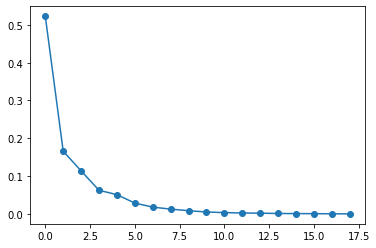

In [135]:
plt.plot(np.arange(len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_)
plt.scatter(np.arange(len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_)
# plt.scatter(pca.explained_variance_ratio_, np.arange(len(pca.explained_variance_ratio_)))

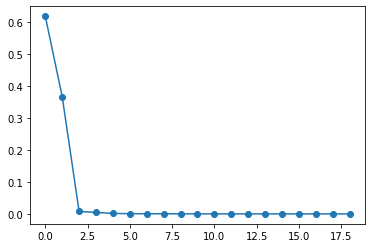

In [86]:
# no normalization
plt.plot(np.arange(len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_)
plt.scatter(np.arange(len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_)
# plt.scatter(pca.explained_variance_ratio_, np.arange(len(pca.explained_variance_ratio_)))

In [72]:
X_train_pca = pca.transform(X_train)

In [136]:
from sklearn.linear_model import LogisticRegression

In [157]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

<BarContainer object of 18 artists>

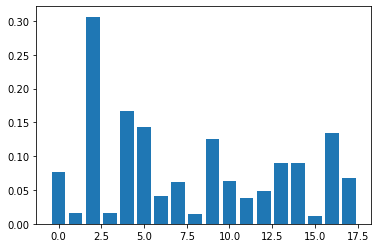

In [158]:
plt.bar(np.arange(len(lr.coef_[0])), np.abs(lr.coef_[0]))

In [138]:
lr.score(X_train, y_train)

0.6994535519125683

In [139]:
lr.score(X_test, y_test)

0.7070707070707071

In [67]:
lr.score(X_train, y_train)

0.7231329690346083

In [68]:
lr.score(X_test, y_test)

0.7407407407407407

In [151]:
lr = LogisticRegression()
lr.fit(X_train_normalized, y_train)

LogisticRegression()

<BarContainer object of 18 artists>

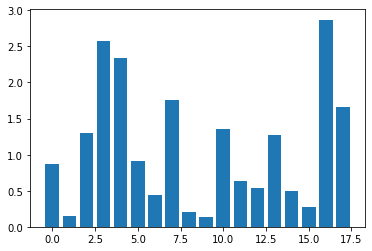

In [156]:
plt.bar(np.arange(len(lr.coef_[0])), np.abs(lr.coef_[0]))

In [141]:
lr.score(X_train_normalized, y_train)

0.7923497267759563

In [142]:
lr.score(sc.transform(X_test), y_test)

0.8148148148148148

In [149]:
lr = LogisticRegression()
lr.fit(X_train_pca[:, :17], y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [150]:
lr.score(X_train_pca[:, :17], y_train)

0.7468123861566485